# Electoral Formulas

## Introduction

According to Farrell (2011), an electoral systems have five main characteristics:

* The _electoral formula_ is the algorithm to convert votes into seats.
* The _ballot structure_: 
    * _categorical_. The voter should choose only one party (closed lists).
    * _ordinal_. The voter should rank some or all of the candidates listed (open lists).
* The _district magnitude_ refers to the number of seats elected from each constituency.
* The _threshold of election_ is the percentage of valid votes required to elect a deputy. 
* _Proportionality_ refers to the accuracy with which the electoral system translates votes into parliamentary representation. It depends of the previous characteristics, so it can be seen as a dependent variable. Lijphart (1990) analyzes the relationship among these variables.

In this notebook, several electoral formulas will be used to calcule the apportionment of the Spanish Congress of Deputies from 1977 to 2016. For each result a set of disproportionality indexes will be estimated.

## Electoral formulas

The apportionment algorithms considered in this notebook belong to the highest averages category. These methods assign seats sequentailly to the parties according to the average each presents for the next seat. Each party's vote total is divided by the _n_-th divisor from a prescribed sequence. Here the definition of each algorithm is obtained from Gallager (1992):

| Formula               |  _n_-th divisor     | Sequence (first five divisors) |
| --------------------- | :-----------------: | ------------------------------ |
| Imperiali             | $\frac{n+1}{2}$     | 1, 1.5,  2,    2.5, 3          |
| d'Hondt               | $n$                 | 1, 2,    3,    4,   5          |
| Sainte-Laguë          | $2n-1$              | 1, 3,    5,    7,   9          |
| Modified Sainte-Laguë | $\frac{10n-5}{7}^*$ | 1, 2.14, 3.57, 5,   6.43       |
| Danish                | $3n-2$              | 1, 4,    7,    10,  13         |

$^*$ If $n=1$ then _n_-th divisor is $1$.

## Measures of disproportionality

A disproportionality index is an aggregated estimator of the difference between votes cast and seats allocation. In the following, we assume that $n$ parties receive $V_1,V_2,\ldots,V_n$ votes in an election (in some articles $n$ represents the number of parties that have reached or exceeded the representation threshold). As a result, some seats in parliament are assigned to each party: $S_1,S_2,\ldots,S_n$. The percentages of votes ($v_i=\frac{V_i}{\sum V_j}(\%), i \in {1,\ldots,n}$) and the percentages of seats ($s_i=\frac{S_i}{\sum S_j} (\%), i \in {1,\ldots,n}$) will be used. In the ideal case, these ratios should be equal. All these indexes have $0$ as optimal value, unless otherwise stated.

* __The Rae index__: $ I_{Rae} = \frac{1}{n} \sum _{i=1}^n |v_i-s_i| $. It represents the mean of absolute deviations. It tends to have very low values, describing the system to be more proportional than it actually is, especially when $n$ is large. In a reviewed version, Rae disregarded parties with less than $0.5\%$ of the vote.
* __The Loosemore-Hanby index__: $ I_{LH} = \frac{1}{2} \sum _{i=1}^n |v_i-s_i| $. It measures the percentage of seats misallocated and tries to avoid the disadvantages of the Rae index. It is the most widely used index.
* __The Grofman index__: $ I_G = \frac{1}{N} \sum _{i=1}^n |v_i-s_i| $. $N$ is the effective number of parties: $N=\frac{1}{\sum {ratio_v}_i^2}$ (some papers use the alternative definition $N_s=\frac{1}{\sum {ratio_s}_i^2}$).
* __The Lijphart index__: $ I_L = \max\limits_{{1 \leq i \leq n}}{|v_i-s_i|} $. It shows the most inaccurately represented party. Some versions use the average of absolute deviations for the two largest parties.
* __The Gallagher index__: $ L_{sq} = \sqrt{\frac{1}{2} \sum _{i=1}^n (v_i-s_i)^2} $. It differs by a constant from the least square index. It weighs more strongly a large absolute deviation than lots of tiny ones. Lijphart (1994) characterizes this index as _the most faithful reflection of disproportionality of election results_. Maybe for that, it has recently become one of the most used.
* __The Saint-Lague index__: $ I_{SL} = \sum_{i=1}^n{\frac{1}{v_i} (v_i-s_i)^2} $. Gallagher (1991) considers this as the soundest index from a theoretical point of view.
* __The D'Hont index__: $ I_{DH} = \max{\frac{s_i}{v_i}} $. The optimal value is $1$.
* __The Cox-Shugart index__: $ I_{CS} = \frac{\sum_{i=1}^n v_i s_i}{\sum_{i=1}^n v_i^2} $. It is the slope of the regression line of  $s_i$ over $v_i$ by least squares. The optimal value is $1$. When largest parties are overrepresented  $b > 1$. Other versions add a bias term to the regression line.

## Election data

All the data files used in this notebook have been generated from a set of Excel files. A phase of data wrangling is required to transform the raw info from the worksheets into the csv files listed below. The master file (spanish_congress_party_names.csv), mapping party acronyms to actual names, is also included.

In [1]:
! ls ./data/spanish_congress*

./data/spanish_congress_1977_06.csv
./data/spanish_congress_1979_03.csv
./data/spanish_congress_1982_10.csv
./data/spanish_congress_1986_06.csv
./data/spanish_congress_1989_10.csv
./data/spanish_congress_1993_06.csv
./data/spanish_congress_1996_03.csv
./data/spanish_congress_2000_03.csv
./data/spanish_congress_2004_03.csv
./data/spanish_congress_2008_03.csv
./data/spanish_congress_2011_11.csv
./data/spanish_congress_2015_12.csv
./data/spanish_congress_2016_06.csv
./data/spanish_congress_party_names.csv


In [2]:
import matplotlib.pyplot as plt
from voting.constants import *
from voting.spain import *

%matplotlib inline

Different disproportionality indexes will be calculated for each legislative election.

In [4]:
indicators_ts_df = calculate_disproportionality_indexes_by_formula()

## Disproportionality indexes by formula over time

Each plot represents one disproportionality index and contains several time series: one for each electoral formula using the current threshold of 3% and in brown the values produced by a apportionment for a single district with no electoral threshold using the D'Hondt rule.

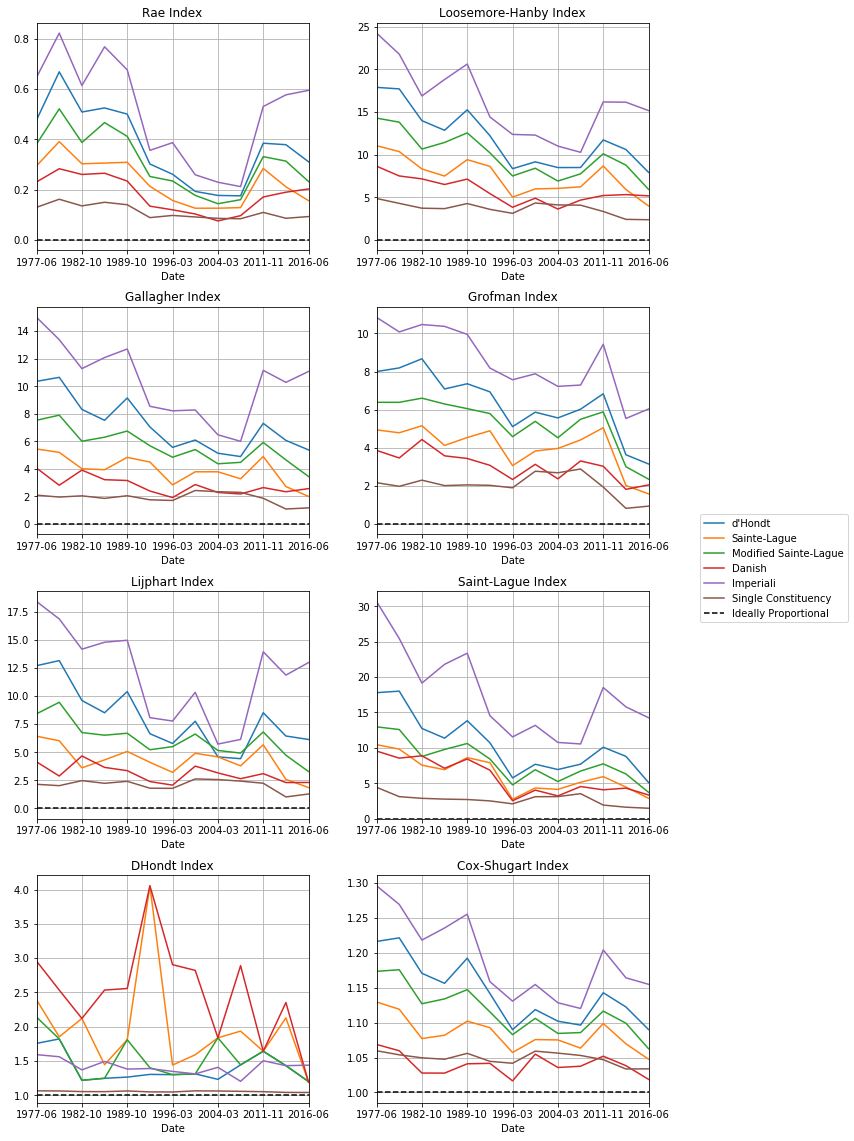

In [17]:
formula_selector = indicators_ts_df['Formula']

fig, axlist = plt.subplots(4, 2)
fig.set_size_inches(10, 20)
indicator_names = ['Rae', 'Loosemore-Hanby', 'Gallagher', 'Grofman', 
                   'Lijphart', 'Saint-Lague', 'DHondt', 'Cox-Shugart']
indicators = [x.lower().replace('-','_') for x in indicator_names]
plt.grid(True)

for idx, ax in enumerate(axlist.flatten()):
    indicator = indicators[idx]
    name = indicator_names[idx]
    optimal = 1 if name in ['DHondt', 'Cox-Shugart'] else 0
    for formula in get_allowed_formulas():
        indicators_ts_df[formula_selector == formula][indicator].plot(ax=ax, title='%s Index' % name, 
                                                                      label=formula)
    indicators_ts_df[formula_selector == 'Single Constituency'][indicator].plot(ax=ax, label='Single Constituency')
    ax.grid(True)
    ax.axhline(y=optimal, linestyle='--', color='k', label='Ideally Proportional')

fig.subplots_adjust(top=0.9, bottom=0.15, left=0.1, right=0.95, hspace=0.25, wspace=0.25)
leg = axlist.flatten()[0].legend(loc='center right', bbox_to_anchor=(3.0, -1.4))

## Conclusions

It seems that electoral formulas can be ranked based on their disproportionality (ignoring the D'Hondt index):

<p><center><b>Imperiali > d'Hondt > Sainte-Laguë > Modified Sainte-Laguë > Danish > d'Hondt for a single district and no threshold</b></center></p>

So, district configurations and electoral thresholds have a greater impact in the disproportionality of an apportionment than the electoral formula.

## References

* Farrell, D. (2011). _Electoral Systems: A Comparative Introduction_, Palgrave, 2nd edition.
* Gallagher, M. (1992). Comparing Proportional Representation Electoral Systems: Quotas, Thresholds, Paradoxes and Majorities, _British Journal of Political Science_, Volume 22, Issue 4, 469-496.